## Import

In [25]:
from ipywidgets import *
from scipy.stats import spearmanr
from sklearn.decomposition import PCA
from numpy import arccos
from numpy.linalg import norm
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

np.set_printoptions(suppress=True)

mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.bottom'] = False
mpl.rcParams['axes.spines.left'] = True

def cos_sim(A, B):
    return np.dot(A, B)/(np.linalg.norm(A)*np.linalg.norm(B))

def theta(v, w): 
    return np.rad2deg(arccos(v.dot(w)/(norm(v)*norm(w))))

## Load data

In [22]:
beta_true_novelty = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/beta_true_novelty.npy')
beta_perm_novelty = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/beta_perm_novelty.npy')
beta_true_memory = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/beta_true_memory.npy')
beta_perm_memory = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/beta_perm_memory.npy')
beta_true_recall = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/beta_true_recall_start.npy')
beta_perm_recall = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/beta_perm_recall_start.npy')
hipp_canonical_component = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/hipp_canonical_component.npy')

Memorability_score = np.load('/home/dasom/State_dynamics/results/Memorability_score.npy')
Memorability_score_numbers = Memorability_score.copy()
Memorability_score_numbers[Memorability_score_numbers > 0] = 1

repetition = 1000 # 100 for memory retrieval subspace

## Alignment angle

In [3]:
roi_num = 0 # hippocampus

cooccur_novelty_true = np.mean(beta_true_novelty[roi_num], axis=0)[:,0]
cooccur_novelty_perm = np.mean(beta_perm_novelty[roi_num], axis=1)[:,:,0]
valence_novelty_true = np.mean(beta_true_novelty[roi_num], axis=0)[:,1]
valence_novelty_perm = np.mean(beta_perm_novelty[roi_num], axis=1)[:,:,1]
memory_true = np.mean(beta_true_memory[roi_num], axis=0)[:,0]
memory_perm = np.mean(beta_perm_memory[roi_num], axis=1)[:,:,0]
retrieval_true = np.mean(beta_true_recall[roi_num], axis=0)[:,0]
retrieval_perm = np.mean(beta_perm_recall[roi_num], axis=1)[:,:,0]

### Explained variance ratio of each functional subspace (Supp Fig. 3A)

(0.0, 1.05)

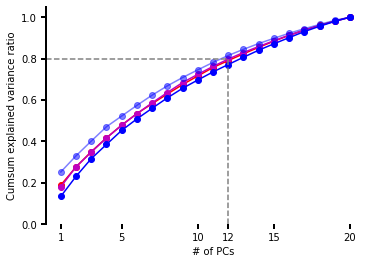

In [10]:
pca_memory_true = PCA(n_components=20)
data_1 = memory_true
pca_memory_true.fit(data_1)

pca_recall_true = PCA(n_components=20)
data_1 = retrieval_true
pca_recall_true.fit(data_1)

pca_novelty_co_true = PCA(n_components=20)
data_1 = cooccur_novelty_true
pca_novelty_co_true.fit(data_1)

pca_novelty_val_true = PCA(n_components=20)
data_1 = valence_novelty_true
pca_novelty_val_true.fit(data_1)

plt.plot(np.cumsum(pca_novelty_co_true.explained_variance_ratio_), 'ro-')
plt.plot(np.cumsum(pca_novelty_val_true.explained_variance_ratio_), 'mo-')
plt.plot(np.cumsum(pca_memory_true.explained_variance_ratio_), 'bo-', alpha = 0.5)
plt.plot(np.cumsum(pca_recall_true.explained_variance_ratio_), 'bo-')
plt.vlines(11,0,0.8,  color = 'grey', linestyle = '--')
plt.hlines(0.8, -1,11, color = 'grey', linestyle = '--')
plt.xticks([0,4,9,11,14,19],[1,5,10,12,15,20])
plt.xlabel('# of PCs')
plt.ylabel('Cumsum explained variance ratio')
plt.xlim([-1,21])
plt.ylim([0,1.05])
# plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/PC_explained_variance.png',dpi=300, bbox_inches = "tight")

### between novelty subspaces (Fig. 4B) or between memory subspaces (Supp Fig. 10A)

[0.036, 0.651, 0.637, 0.644, 0.955, 0.644, 0.202, 0.033, 0.378, 0.173, 0.539, 0.018]


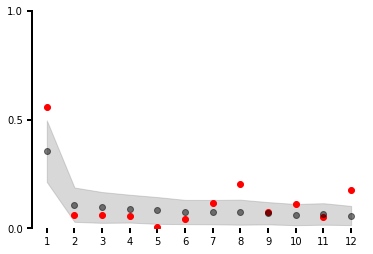

In [6]:
alignment_null_dist = []
for repeat in range(repetition):
    pca_cog1 = PCA(n_components=12)
    data_cog1 = memory_perm[repeat]
    pca_cog1.fit(data_cog1)

    pca_cog2 = PCA(n_components=12)
    data_cog2 = retrieval_true
    pca_cog2.fit(data_cog2)

    alignment_null_dist.append([cos_sim(pca_cog1.components_[pc], pca_cog2.components_[pc]) for pc in range(12)])
alignment_null_dist = np.abs(alignment_null_dist)

pca_cog1 = PCA(n_components=12)
data_cog1 = memory_true
pca_cog1.fit(data_cog1)

pca_cog2 = PCA(n_components=12)
data_cog2 = retrieval_true
pca_cog2.fit(data_cog2)

alignment_observed = np.abs([cos_sim(pca_cog1.components_[pc], pca_cog2.components_[pc]) for pc in range(12)])

plt.scatter(np.arange(12), alignment_observed, s = 50, color = 'r', edgecolor = 'k')
plt.plot(np.mean(alignment_null_dist, axis=0), 'ko', alpha = 0.5)
errorh = np.std(alignment_null_dist, axis=0)
plt.fill_between(np.arange(12), np.mean(alignment_null_dist, axis=0)-errorh, np.mean(alignment_null_dist, axis=0)+errorh, alpha = 0.3,color = 'grey')
plt.ylim([-0.0, 1.0])
plt.xticks(np.arange(12), np.arange(1,12+1))
plt.yticks([0,0.5,1])

print([np.sum(alignment_null_dist[:,pc] > alignment_observed[pc])/repetition for pc in range(12)])
# plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/Principal_angle_novelty2.png',dpi=300, bbox_inches = "tight")

### between novelty and memory subspaces (Fig. 6C)

In [11]:
cooccur_memory1_true = cos_sim(pca_novelty_co_true.components_[0], pca_memory_true.components_[0])
cooccur_memory2_true = cos_sim(pca_novelty_co_true.components_[0], pca_memory_true.components_[1])

cooccur_memory1_perm = []
cooccur_memory2_perm = []
for r in range(repetition):

    pca_novelty_co = PCA(n_components=12)
    data_1 = np.mean(beta_perm_novelty[0][r], axis=0)[:,0]
    pca_novelty_co.fit(data_1)

    pca_memory = PCA(n_components=12)
    data_1 = np.mean(beta_perm_memory[0][r], axis=0)[:,0]
    pca_memory.fit(data_1)

    cooccur_memory1_perm.append(cos_sim(pca_novelty_co.components_[0], pca_memory.components_[0]))
    cooccur_memory2_perm.append(cos_sim(pca_novelty_co.components_[0], pca_memory.components_[1]))

valence_memory1_true = cos_sim(pca_novelty_val_true.components_[0], pca_memory_true.components_[0])
valence_memory2_true = cos_sim(pca_novelty_val_true.components_[0], pca_memory_true.components_[1])

valence_memory1_perm = []
valence_memory2_perm = []
for r in range(len(beta_perm_novelty[0])):

    pca_novelty_val = PCA(n_components=12)
    data_1 = np.mean(beta_perm_novelty[0][r], axis=0)[:,1]
    pca_novelty_val.fit(data_1)

    pca_memory = PCA(n_components=12)
    data_1 = np.mean(beta_perm_memory[0][r], axis=0)[:,0]
    pca_memory.fit(data_1)

    valence_memory1_perm.append(cos_sim(pca_novelty_val.components_[0], pca_memory.components_[0]))
    valence_memory2_perm.append(cos_sim(pca_novelty_val.components_[0], pca_memory.components_[1]))

cooccur_recall1_true = cos_sim(pca_novelty_co_true.components_[0], pca_recall_true.components_[0])
cooccur_recall2_true = cos_sim(pca_novelty_co_true.components_[0], pca_recall_true.components_[1])

cooccur_recall1_perm = []
cooccur_recall2_perm = []
for r in range(len(beta_perm_novelty[0])):

    pca_novelty_co = PCA(n_components=12)
    data_1 = np.mean(beta_perm_novelty[0][r], axis=0)[:,0]
    pca_novelty_co.fit(data_1)

    cooccur_recall1_perm.append(cos_sim(pca_novelty_co.components_[0], pca_recall_true.components_[0]))
    cooccur_recall2_perm.append(cos_sim(pca_novelty_co.components_[0], pca_recall_true.components_[1]))

valence_recall1_true = cos_sim(pca_novelty_val_true.components_[0], pca_recall_true.components_[0])
valence_recall2_true = cos_sim(pca_novelty_val_true.components_[0], pca_recall_true.components_[1])

valence_recall1_perm = []
valence_recall2_perm = []
for r in range(len(beta_perm_novelty[0])):

    pca_novelty_val = PCA(n_components=12)
    data_1 = np.mean(beta_perm_novelty[0][r], axis=0)[:,1]
    pca_novelty_val.fit(data_1)
    
    valence_recall1_perm.append(cos_sim(pca_novelty_val.components_[0], pca_recall_true.components_[0]))
    valence_recall2_perm.append(cos_sim(pca_novelty_val.components_[0], pca_recall_true.components_[1]))

(0.0, 0.6)

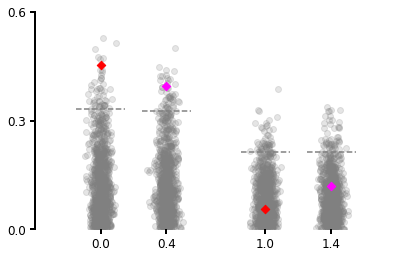

In [20]:
corr_look = np.abs([cooccur_memory2_true, valence_memory2_true, cooccur_recall2_true, valence_recall2_true])
random_look = np.abs([cooccur_memory2_perm, valence_memory2_perm, cooccur_recall2_perm, valence_recall2_perm])
chance_level = [np.sort(random_look[c])[949] for c in range(4)]

x_pos = [0,0.4,1,1.4]
plt.figure(figsize = [6.5,4])
plt.xticks(x_pos, fontsize = 12)
plt.yticks([0,0.3,0.6], fontsize = 12)
plt.xlim([-0.4,1.8])
plt.hlines([0],-1,5, 'black', linewidth = 1, linestyle = '--')
for i in range(len(corr_look)):
    if i in [0,2]:
        plt.scatter(x_pos[i], corr_look[i], color = 'red', marker = 'D', zorder = 2)
    else:
        plt.scatter(x_pos[i], corr_look[i], color = 'magenta', marker = 'D', zorder = 2)

for c in range(4):
    plt.hlines(chance_level[c], x_pos[c]-0.15, x_pos[c]+0.15, color = 'grey', linestyle = '--')

for c in range(4):
    plt.scatter(np.random.normal(size=1000)/30 + x_pos[c], random_look[c], color = 'grey', alpha = 0.2)

plt.ylim([0, 0.6])
# plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/Alignment_angle_novelty_movie_recall.png',dpi=300, bbox_inches = "tight")

### between subspace alignment and recall performance (Fig. 5B, Supp Fig. 6)

In [ ]:
true_cooccur_valence = []
true_cooccur_memory = []
true_valence_memory = []
for subj in range(24):

    pca_novelty = PCA(n_components=12)
    data = beta_true_novelty[roi_num][subj][:,0]
    data_hipp_cooccur = pca_novelty.fit(data)

    pca_novelty = PCA(n_components=12)
    data = beta_true_novelty[roi_num][subj][:,1]
    data_hipp_valence = pca_novelty.fit(data)

    pca_memory = PCA(n_components=12)
    data = beta_true_memory[roi_num][subj][:,0]
    data_hipp_memory = pca_memory.fit(data)

    true_cooccur_valence.append(cos_sim(data_hipp_cooccur.components_[0], data_hipp_valence.components_[0]))
    true_cooccur_memory.append(cos_sim(data_hipp_cooccur.components_[1], data_hipp_memory.components_[0]))
    true_valence_memory.append(cos_sim(data_hipp_valence.components_[1], data_hipp_memory.components_[0]))

true_cooccur_valence = np.abs(true_cooccur_valence)
true_cooccur_memory = np.abs(true_cooccur_memory)
true_valence_memory = np.abs(true_valence_memory)

perm_cooccur_valence = []
perm_cooccur_memory = []
perm_valence_memory = []
for rep in range(1000):
    no_no = []
    no_mem1 = []
    no_mem2 = []
    for subj in range(24):

        pca_novelty = PCA(n_components=12)
        data = beta_perm_novelty[roi_num][rep][subj][:,0]
        data_hipp_cooccur = pca_novelty.fit(data)

        pca_novelty = PCA(n_components=12)
        data = beta_perm_novelty[roi_num][rep][subj][:,1]
        data_hipp_valence = pca_novelty.fit(data)

        pca_memory = PCA(n_components=12)
        data = beta_perm_memory[roi_num][rep][subj][:,0]
        data_hipp_memory = pca_memory.fit(data)

        no_no.append(cos_sim(data_hipp_cooccur.components_[0], data_hipp_valence.components_[0]))
        no_mem1.append(cos_sim(data_hipp_cooccur.components_[1], data_hipp_memory.components_[0]))
        no_mem2.append(cos_sim(data_hipp_valence.components_[1], data_hipp_memory.components_[0]))

    perm_cooccur_valence.append(spearmanr(np.abs(no_no), np.mean(Memorability_score_numbers, axis=1))[0])
    perm_cooccur_memory.append(spearmanr(np.abs(no_mem1), np.mean(Memorability_score_numbers, axis=1))[0])
    perm_valence_memory.append(spearmanr(np.abs(no_mem2), np.mean(Memorability_score_numbers, axis=1))[0])

SpearmanrResult(correlation=0.4424601010435927, pvalue=0.03038337133350162)


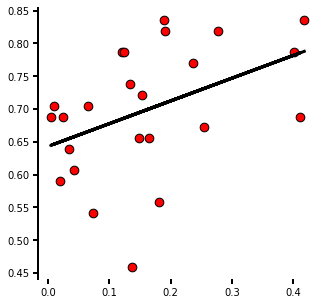

In [76]:
plt.figure(figsize = [5,5])

x = true_cooccur_memory
y = np.mean(Memorability_score_numbers, axis=1)

plt.scatter(x, y, s = 75, color = 'red', edgecolor = 'k')
plt.xticks([0,0.1,0.2,0.3,0.4])

a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
plt.plot(x, y_est, '-', color = 'black', linewidth = 3)
print(spearmanr(x, y))
# plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/No_mem_alignment_recall_performance_valence.png',dpi=300, bbox_inches = "tight")

In [ ]:
plt.hist(perm_cooccur_memory,bins = 50, color = 'grey', alpha = 0.5)
plt.vlines(spearmanr(true_cooccur_memory, np.mean(Memorability_score_numbers, axis=1))[0], 0, 60, color = 'black', linewidth = 3)
plt.xticks([-0.6,-0.3,0,0.3,0.6])
plt.yticks([0,15,30,45,60])
plt.xlim([-0.8,0.8])
# plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/No_no_alignment_recall_performance_control.png',dpi=300, bbox_inches = "tight")

### between functional subspaces and canonical space (Fig. 7)

In [ ]:
pca_cooccur = PCA(n_components=12)
data = np.mean(beta_true_novelty[0], axis=0)[:,0]
data_hipp_cooccur = pca_cooccur.fit(data)

pca_valence = PCA(n_components=12)
data = np.mean(beta_true_novelty[0], axis=0)[:,1]
data_hipp_valence = pca_valence.fit(data)

pca_memory = PCA(n_components=12)
data = np.mean(beta_true_memory[0], axis=0)[:,0]
data_hipp_memory = pca_memory.fit(data)

pca_recall = PCA(n_components=12)
data = np.mean(beta_true_recall[0], axis=0)[:,0]
data_hipp_recall = pca_recall.fit(data)

true_canonical_cooccurs = np.abs([cos_sim(hipp_canonical_component[pc], data_hipp_cooccur.components_[0]) for pc in range(5)])
true_canonical_valences = np.abs([cos_sim(hipp_canonical_component[pc], data_hipp_valence.components_[0]) for pc in range(5)])
true_canonical_memorys = np.abs([cos_sim(hipp_canonical_component[pc], data_hipp_memory.components_[0]) for pc in range(5)])
true_canonical_retrievals = np.abs([cos_sim(hipp_canonical_component[pc], data_hipp_recall.components_[0]) for pc in range(5)])

perm_canonical_cooccurs = []
perm_canonical_valences = []
perm_canonical_memorys = []
for pc in range(5):
    cs1 = []
    cs2 = []
    cs3 = []
    for rep in range(1000):
        pca_cooccur = PCA(n_components=12)
        data = np.mean(beta_perm_novelty[0][rep], axis=0)[:,0]
        data_hipp_cooccur = pca_cooccur.fit(data)

        pca_valence = PCA(n_components=12)
        data = np.mean(beta_perm_novelty[0][rep], axis=0)[:,1]
        data_hipp_valence = pca_valence.fit(data)

        pca_memory = PCA(n_components=12)
        data = np.mean(beta_perm_memory[0][rep], axis=0)[:,0]
        data_hipp_memory = pca_memory.fit(data)
        cs3.append(cos_sim(hipp_canonical_component[pc], data_hipp_memory.components_[0]))

        cs1.append(cos_sim(hipp_canonical_component[pc], data_hipp_cooccur.components_[0]))
        cs2.append(cos_sim(hipp_canonical_component[pc], data_hipp_valence.components_[0]))
    perm_canonical_cooccurs.append(cs1)
    perm_canonical_valences.append(cs2)
    perm_canonical_memorys.append(cs3)

perm_canonical_retreivals = []
for pc in range(5):
    cs4 = []
    for rep in range(100):
        pca_recall = PCA(n_components=12)
        data = np.mean(beta_perm_recall[0][rep], axis=0)[:,0]
        data_hipp_recall = pca_recall.fit(data)
        cs4.append(cos_sim(hipp_canonical_component[pc], data_hipp_recall.components_[0]))

    perm_canonical_retreivals.append(cs4)

perm_canonical_cooccurs = np.abs(perm_canonical_cooccurs)
perm_canonical_valences = np.abs(perm_canonical_valences)
perm_canonical_memorys = np.abs(perm_canonical_memorys)
perm_canonical_retreivals = np.abs(perm_canonical_retreivals)

print([np.sum(np.abs(perm_canonical_cooccurs[pc]) > true_canonical_cooccurs[pc])/1000 for pc in range(5)])
print([np.sum(np.abs(perm_canonical_valences[pc]) > true_canonical_valences[pc])/1000 for pc in range(5)])
print([np.sum(np.abs(perm_canonical_memorys[pc]) > true_canonical_memorys[pc])/1000 for pc in range(5)])
print([np.sum(np.abs(perm_canonical_retreivals[pc]) > true_canonical_retrievals[pc])/100 for pc in range(5)])

In [ ]:
true_data = true_canonical_valences
perm_data = perm_canonical_valences

plt.scatter(np.arange(5), true_data, s = 50, color = 'skyblue', edgecolor = 'k')
plt.scatter(np.arange(5), np.mean(np.abs(perm_data), axis=1), s = 50, color = 'grey', edgecolor = 'k')
errorh = np.std(np.abs(perm_data), axis=1)
plt.fill_between(np.arange(5), np.mean(np.abs(perm_data), axis=1)-errorh, np.mean(np.abs(perm_data), axis=1)+errorh, alpha = 0.3,color = 'grey')
plt.xticks([0,1,2,3,4])
plt.yticks([0,0.5,1])
plt.ylim([0,1])
# plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/Canonical_recall_sim.png',dpi=300, bbox_inches = "tight")